In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:

# read in data as a numpy array 
data = np.loadtxt('alpha_beta_U_525.csv', delimiter=',')

vel = data[:,0]
alpha = data[:,1]
beta = data[:,2]

"""
# add a top row headers
df.columns = ['v','alpha', 'beta']
vel = df['v']
alpha = df['alpha']
beta = df['beta']
data.shape
"""

"\n# add a top row headers\ndf.columns = ['v','alpha', 'beta']\nvel = df['v']\nalpha = df['alpha']\nbeta = df['beta']\ndata.shape\n"

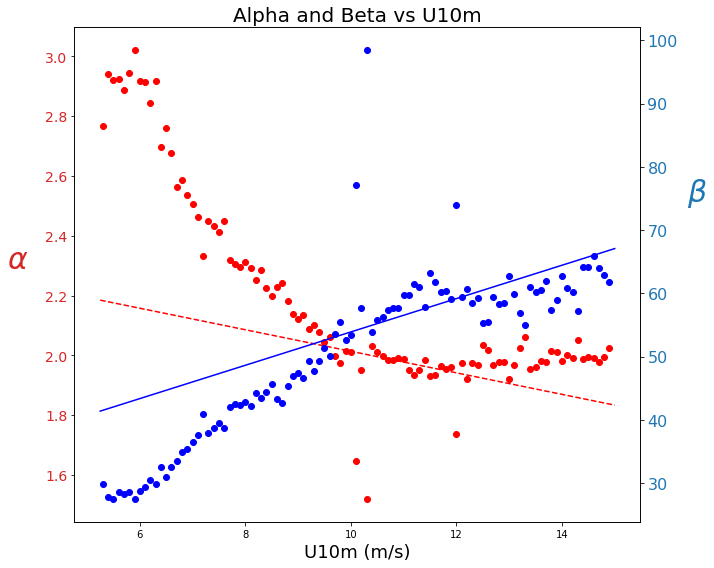

In [5]:
U_fine = np.linspace(5.25, 15, 100)
alpha_fine = -0.036*U_fine+2.3736
beta_fine = 2.6376*U_fine+27.5125

# plot with 2 y axis one for alpha and one for beta
fig, ax1 = plt.subplots(figsize=(10, 8))

# plt style seaborn
#plt.style.use('seaborn')

color = 'tab:red'
ax1.set_xlabel('U10m (m/s)',fontsize = 18)
ax1.set_ylabel(r'$\alpha$', color=color,fontsize = 30, rotation = 0)
ax1.plot(vel, alpha,'r.',markersize = 12, label = 'alpha')
ax1.plot(U_fine, alpha_fine, 'r--', label = 'alpha fit')
ax1.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize = 14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r'$\beta$', color=color,fontsize = 30, rotation = 0)  # we already handled the x-label with ax1
ax2.plot(vel, beta, 'b.',markersize = 12, label = 'beta')
ax2.plot(U_fine, beta_fine, 'b-', label = 'beta fit')
ax2.tick_params(axis='y', labelcolor=color)

# align the y axis labels
ax1.yaxis.set_label_coords(-0.1,0.5)
ax2.yaxis.set_label_coords(1.1,0.7)

#ax1.yaxis.label.set_color('red')
#ax2.yaxis.label.set_color('blue')

# set font size for ticks and labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Alpha and Beta vs U10m', fontsize = 20)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




In [9]:
# new fit for alpha and beta
flag_test = (alpha>1.7) & (beta <70)
alpha_new = alpha[flag_test]
U_new_1 = vel[flag_test]

# fit a linear line to the data
m, b = np.polyfit(U_new_1, alpha_new, 1)

# exponential fit to the data   
def expo_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

# fit the data to the function
popt, pcov = curve_fit(expo_fit, U_new_1, alpha_new, p0=(2, 0.1, 1))

# stats on both linear and exponential fit which is better
print('Linear fit: alpha =', m, '* U10m +', b)
print('Exponential fit: alpha =', popt[0], '* exp(-', popt[1], '* U10m) +', popt[2])

# calculate the r-squared value for both fits
residuals = alpha_new - (m*U_new_1 + b)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((alpha_new-np.mean(alpha_new))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared for linear fit:', r_squared)

residuals = alpha_new - expo_fit(U_new_1, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((alpha_new-np.mean(alpha_new))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared for exponential fit:', r_squared)





plt.figure(figsize=(10, 8))
# plot the data and the fit
plt.plot(U_new_1, alpha_new, 'r.', label='Data',markersize = 12)
#plt.plot(U_new_1, m*U_new_1 + b, 'r-', label='Linear fit')
plt.plot(U_new_1, expo_fit(U_new_1, *popt), 'r--', label='expo fit')

plt.xlabel('U10m (m/s)', fontsize = 20)
plt.ylabel(r'$\alpha$', fontsize = 30, rotation = 0)
#plt.title('Alpha vs U10m', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

# output coefficinets of exponential fit
print(popt)

alpha_model = expo_fit(U_new_1, *popt)

test_u = np.linspace(5.25,20,100)
test_alpha = expo_fit(test_u, *popt)



Linear fit: alpha = -0.09571199033955334 * U10m + 3.176839202205283
Exponential fit: alpha = 11.582456939985777 * exp(- 0.4285108048301984 * U10m) + 1.9177252014574118
R-squared for linear fit: 0.7150310976768747
R-squared for exponential fit: 0.9475573252894496


TypeError: cannot unpack non-iterable Figure object

<Figure size 720x576 with 0 Axes>

Linear fit: beta = 3.8789115609660487 * U10m + 10.417607908528634
Logarithmic fit: beta = 37.97555263468295 * log( 0.3813384098847975 * U10m)
R-squared for linear fit: 0.887866857240744
R-squared for logarithmic fit: 0.9372168722841346


/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


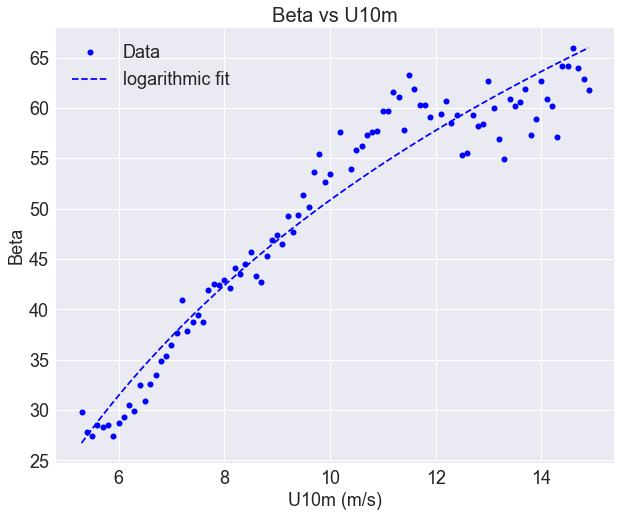

[37.97555263  0.38133841]


In [11]:
# new fit for alpha and beta

beta_new = beta[flag_test]
U_new_1 = vel[flag_test]

# fit a linear line to the data
m, b = np.polyfit(U_new_1, beta_new, 1)


# fit logaritmic function to the data
def log_fit(x, a, b, c):
    return a*np.log(b*x) + c

def log_fit_2(x,a,b):
    return a*np.log(b*x)

# fit the data to the function
popt, pcov = curve_fit(log_fit_2, U_new_1, beta_new, p0=(0.1, 0.1))

# stats on both linear and exponential fit which is better
print('Linear fit: beta =', m, '* U10m +', b)
print('Logarithmic fit: beta =', popt[0], '* log(', popt[1], '* U10m)')


# calculate the r-squared value for both fits
residuals = beta_new - (m*U_new_1 + b)

ss_res = np.sum(residuals**2)
ss_tot = np.sum((beta_new-np.mean(beta_new))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared for linear fit:', r_squared)

residuals = beta_new - log_fit_2(U_new_1, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((beta_new-np.mean(beta_new))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared for logarithmic fit:', r_squared)


plt.figure(figsize=(10, 8))
# plot the data and the fit
plt.plot(U_new_1, beta_new, 'b.', label='Data',markersize = 12)
#plt.plot(U_new_1, m*U_new_1 + b, 'b-', label='Linear fit')
plt.plot(U_new_1, log_fit_2(U_new_1, *popt), 'b--', label='logarithmic fit')

plt.xlabel('U10m (m/s)', fontsize = 18)
plt.ylabel('Beta', fontsize = 18)
plt.title('Beta vs U10m', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

# output coefficinets of exponential fit
print(popt)

beta_model = log_fit_2(U_new_1, *popt)

test_beta = log_fit_2(test_u, *popt)


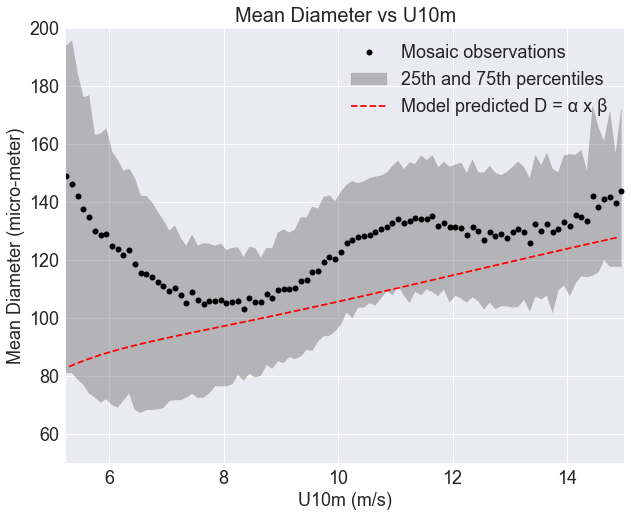

In [12]:
# mosaic observations for diameter
mosaic_obs = np.loadtxt('observations_mosaic.csv', delimiter = ',')

mosaic_vel = mosaic_obs[:,0]
mosaic_mean_diams = mosaic_obs[:,1]
mosaic_25_diams = mosaic_obs[:,2]
mosaic_75_diams = mosaic_obs[:,3]

# model predictions for diameter
diam_model = alpha_model * beta_model


# plot diameter vs wind speed with shading for 25th and 75th percentiles
plt.figure(figsize=(10, 8))
plt.plot(mosaic_vel, mosaic_mean_diams, 'k.', label='Mosaic observations', markersize = 12)
plt.fill_between(mosaic_vel, mosaic_25_diams, mosaic_75_diams, color='grey', alpha=0.5, label='25th and 75th percentiles')
#plt.plot(U_new_1, diam_model, 'r--', label='Model predictions (alpha beta)')

plt.plot(U_new_1, diam_model, 'r--', label=u'Model predicted D = \u03B1 x \u03B2')

plt.xlabel('U10m (m/s)', fontsize = 18)
plt.ylabel('Mean Diameter (micro-meter)', fontsize = 18)
plt.xlim(5.25, 15)
plt.ylim(50, 200)
plt.title('Mean Diameter vs U10m', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.show()



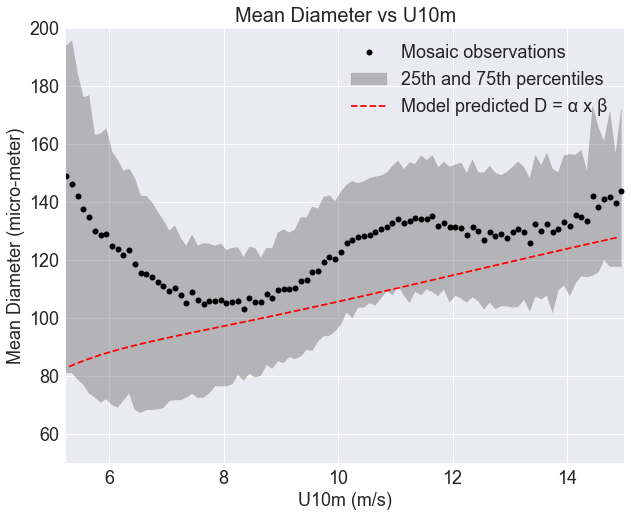

In [14]:
# mosaic observations for diameter
mosaic_obs = np.loadtxt('observations_mosaic.csv', delimiter = ',')

mosaic_vel = mosaic_obs[:,0]
mosaic_mean_diams = mosaic_obs[:,1]
mosaic_25_diams = mosaic_obs[:,2]
mosaic_75_diams = mosaic_obs[:,3]

# model predictions for diameter
diam_model = alpha_model * beta_model


# plot diameter vs wind speed with shading for 25th and 75th percentiles
plt.figure(figsize=(10, 8))
plt.plot(mosaic_vel, mosaic_mean_diams, 'k.', label='Mosaic observations', markersize = 12)
plt.fill_between(mosaic_vel, mosaic_25_diams, mosaic_75_diams, color='grey', alpha=0.5, label='25th and 75th percentiles')
#plt.plot(U_new_1, diam_model, 'r--', label='Model predictions (alpha beta)')

plt.plot(U_new_1, diam_model, 'r--', label=u'Model predicted D = \u03B1 x \u03B2')

plt.xlabel('U10m (m/s)', fontsize = 18)
plt.ylabel('Mean Diameter (micro-meter)', fontsize = 18)
plt.xlim(5.25, 15)
plt.ylim(50, 200)
plt.title('Mean Diameter vs U10m', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.show()



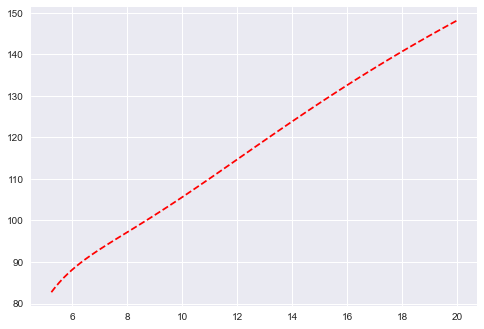

In [15]:
plt.plot(test_u, test_alpha*test_beta, 'r--', label='Model predictions (alpha beta)')

# add scatter plot of just observations 

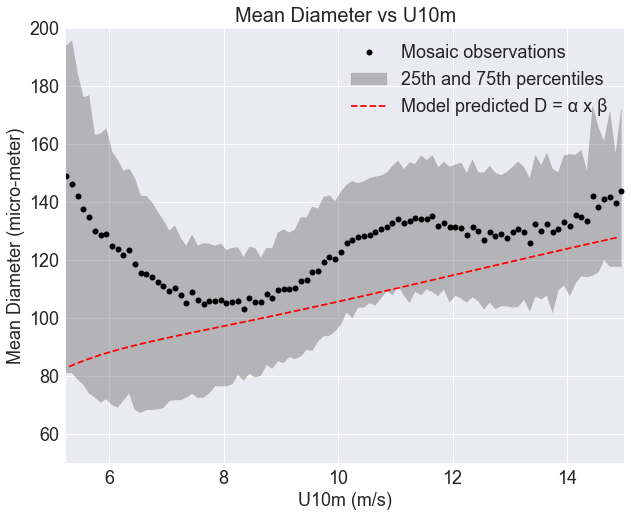

In [8]:
# mosaic observations for diameter
#mosaic_obs = np.loadtxt('observations_mosaic.csv', delimiter = ',')

#mosaic_vel = mosaic_obs[:,0]
#mosaic_mean_diams = mosaic_obs[:,1]
#mosaic_25_diams = mosaic_obs[:,2]
#mosaic_75_diams = mosaic_obs[:,3]

# model predictions for diameter
#diam_model = alpha_model * beta_model


# plot diameter vs wind speed with shading for 25th and 75th percentiles
plt.figure(figsize=(10, 8))
plt.plot(mosaic_vel, mosaic_mean_diams, 'k.', label='Mosaic observations', markersize = 12)
plt.fill_between(mosaic_vel, mosaic_25_diams, mosaic_75_diams, color='grey', alpha=0.5, label='25th and 75th percentiles')
#plt.plot(U_new_1, diam_model, 'r--', label='Model predictions (alpha beta)')

plt.plot(U_new_1, diam_model, 'r--', label=u'Model predicted D = \u03B1 x \u03B2')

plt.xlabel('U10m (m/s)', fontsize = 18)
plt.ylabel('Mean Diameter (micro-meter)', fontsize = 18)
plt.xlim(5.25, 15)
plt.ylim(50, 200)
plt.title('Mean Diameter vs U10m', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.show()



In [9]:
# in the above plot, use index 0 , half way and end values of alphs and beta to plot gamma distributions 

alpha_1 = alpha_model[0]
beta_1 = beta_model[0]

alpha_2 = alpha_model[50]
beta_2 = beta_model[50]

alpha_3 = alpha_model[-1]
beta_3 = beta_model[-1]

dp_fine = np.linspace(1, 500, 1000)

# gamma fitteed pdf

pdf_fitted_1 = gamma.pdf(dp_fine, alpha_1, scale=beta_1)
pdf_fitted_2 = gamma.pdf(dp_fine, alpha_2, scale=beta_2)
pdf_fitted_3 = gamma.pdf(dp_fine, alpha_3, scale=beta_3)



# plot gamma distributions for 3 cases
plt.figure(figsize=(10, 8))
plt.plot(dp_fine, pdf_fitted_1, 'r-', label=f'U10m = {U_new_1[0]}m/s')
plt.plot(dp_fine, pdf_fitted_2, 'b-', label=f'U10m = {U_new_1[50]}m/s')
plt.plot(dp_fine, pdf_fitted_3, 'g-', label=f'U10m = {U_new_1[-1]}m/s')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Gamma distribution (snow particle distribution) for 3 different wind speeds', fontsize = 20)

plt.legend(fontsize = 18)

NameError: name 'gamma' is not defined

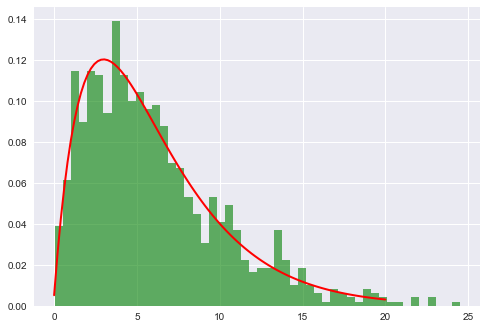

In [ ]:
# fit a gamma sitribution to random data 
from scipy.stats import gamma
import matplotlib.pyplot as plt
import numpy as np

# generate random data
data = np.random.gamma(2, 3, 1000)

# fit the data to a gamma distribution
shape, loc, scale = gamma.fit(data)

# plot the histogram of the data
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# plot the pdf of the fitted gamma distribution
x = np.linspace(0, 20, 100)
pdf_fitted_1 = gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf_fitted_1, 'r-', lw=2)

plt.show()





In [ ]:
loc

-0.05410476823705074

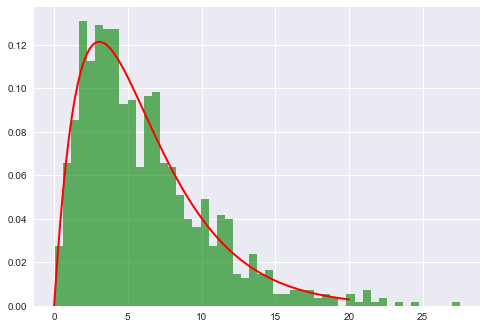

In [ ]:
# generate random data
data = np.random.gamma(2, 3, 1000)

# fit the data to a gamma distribution
shape, loc ,scale = gamma.fit(data, floc = 0)

# plot the histogram of the data
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# plot the pdf of the fitted gamma distribution
x = np.linspace(0, 20, 100)
pdf_fitted_2 = gamma.pdf(x, shape,loc , scale)
plt.plot(x, pdf_fitted_2, 'r-', lw=2)

plt.show()


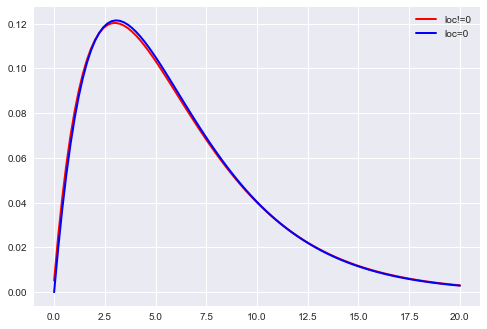

In [ ]:
plt.plot(x, pdf_fitted_1, 'r-', lw=2, label = 'loc!=0')
plt.plot(x, pdf_fitted_2, 'b-', lw=2, label = 'loc=0')
plt.legend()

In [ ]:
scale

3.004827682223854